                 GDP per capita  Life satisfaction
Country                                           
Mexico                 9009.280                6.6
Russia                 9054.914                6.0
Turkey                 9437.372                5.5
Hungary               12239.894                5.3
Chile                 13340.905                6.7
Slovak Republic       15991.736                6.1
Czech Republic        17256.918                6.6
Estonia               17288.083                5.6
Greece                18064.288                5.2
Portugal              19121.592                5.2
Slovenia              20732.482                5.8
Spain                 25864.721                6.4
Korea                 27195.197                5.9
Italy                 29866.581                5.9
Japan                 32485.545                5.9
Israel                35343.336                7.2
New Zealand           37044.891                7.3
France                37675.006

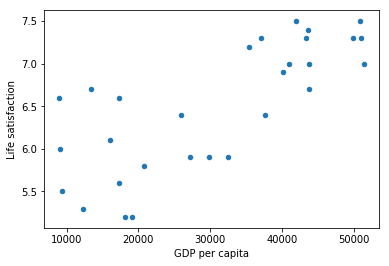

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression

## OECD 삶의 만족도(life satisfaction) 데이터와 1인당 GDP(GDP per capita) 데이터를 합침
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

## 데이터 적재(pandas 라이브러리 이용)
oecd_bli = pd.read_csv("D:/PythonTest/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("D:/PythonTest/GDP_per_capita_2015.xls", thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")

## 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
print(country_stats)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

## 데이터 시각화(산점도 그리기)
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()


In [12]:

##선형 모델 선택
model = sklearn.linear_model.LinearRegression()

##모델훈련
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
##중국 GDP 7989.72에 대한 만족도 계산
X_new = [[7989.72]]
print('2015 중국 삶의 만족도: ' + str(model.predict(X_new)))

2015 중국 삶의 만족도: [[5.60995887]]


In [18]:
##한국 GDP 27195.197에 대한 만족도 계산
X_new = [[27195.197]]
print('2015 중국 삶의 만족도: ' + str(model.predict(X_new)))

2015 중국 삶의 만족도: [[6.36579531]]
